Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy: 95.25%


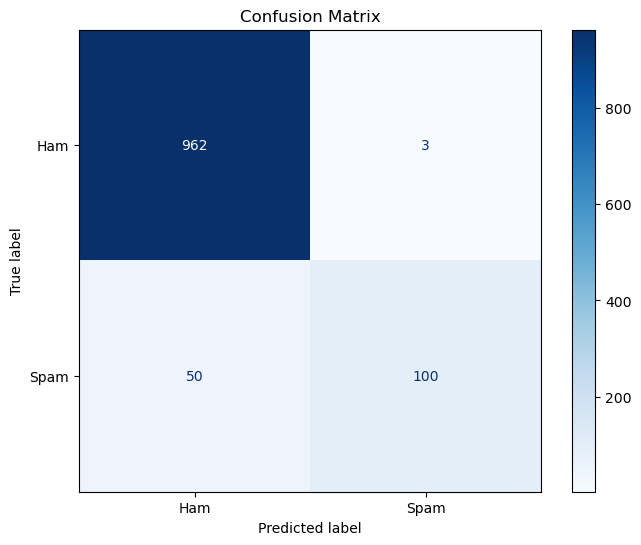

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score


file_path = 'spam.csv'  
data = pd.read_csv(file_path, encoding='latin-1')
data_cleaned = data[['v1', 'v2']].rename(columns={'v1': 'Label', 'v2': 'Message'})
data_cleaned['Label'] = data_cleaned['Label'].map({'ham': 0, 'spam': 1})

X_train, X_test, y_train, y_test = train_test_split(
    data_cleaned['Message'], data_cleaned['Label'], test_size=0.2, random_state=42
)


tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.9)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test_tfidf, y_test, display_labels=['Ham', 'Spam'], cmap='Blues', ax=ax)
plt.title("Confusion Matrix")
plt.show()
